In [6]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si

In [17]:
AAPL = wb.DataReader('AAPL', data_source='yahoo', start='1995-1-1')

In [18]:
#First Five
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,0.347098,0.338170,0.347098,0.342634,1.038688e+08,0.290871
1995-01-04,0.353795,0.344866,0.344866,0.351563,1.586816e+08,0.298451
1995-01-05,0.351563,0.345982,0.350446,0.347098,7.364000e+07,0.294660
1995-01-06,0.385045,0.367188,0.371652,0.375000,1.076622e+09,0.318347
1995-01-09,0.373884,0.366071,0.371652,0.367885,2.740864e+08,0.312307


In [19]:
#Last Five
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-20,144.839996,141.270004,143.800003,142.940002,123478900.0,142.940002
2021-09-21,144.600006,142.779999,143.929993,143.429993,75834000.0,143.429993
2021-09-22,146.429993,143.699997,144.449997,145.850006,76404300.0,145.850006
2021-09-23,147.080002,145.639999,146.649994,146.830002,64838200.0,146.830002
2021-09-24,147.470001,145.559998,145.660004,146.919998,53434200.0,146.919998


In [20]:
#Simple Return Calculation
AAPL['simple_return'] = (AAPL['Adj Close'] / AAPL['Adj Close'].shift(1)) - 1
print (AAPL['simple_return'])

Date
1995-01-03         NaN
1995-01-04    0.026060
1995-01-05   -0.012700
1995-01-06    0.080386
1995-01-09   -0.018973
                ...   
2021-09-20   -0.021361
2021-09-21    0.003428
2021-09-22    0.016872
2021-09-23    0.006719
2021-09-24    0.000613
Name: simple_return, Length: 6731, dtype: float64


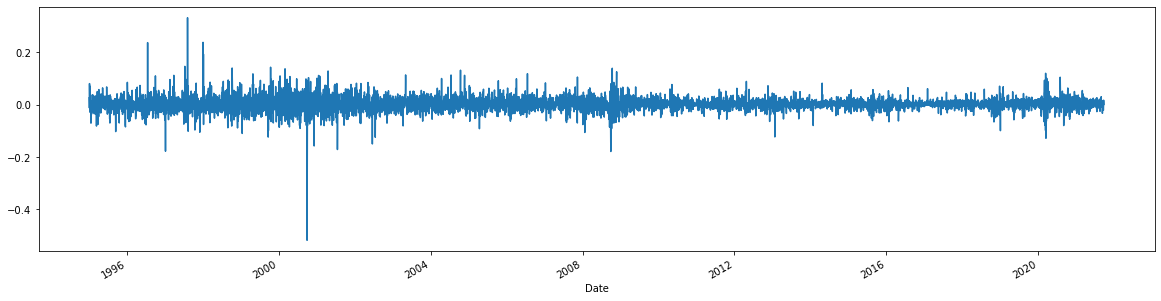

In [30]:
#Simple Return Plot
AAPL['simple_return'].plot(figsize=(20,5))
plt.show()

In [22]:
#Average return per day
avg_returns_d = AAPL['simple_return'].mean()
avg_returns_d

0.0013129534871270888

In [23]:
#Average return annually 
avg_returns_a = AAPL['simple_return'].mean() * 250
avg_returns_a 

0.32823837178177223

In [47]:
#Average annual return in percentage points
print (round(avg_returns_a, 5) * 100) 

32.824


In [66]:
#log returns are for single stocks

In [67]:
AAPL['log_return'] = np.log(AAPL['Adj Close'] / AAPL['Adj Close'].shift(1))
print (AAPL['log_return'])

Date
1995-01-03         NaN
1995-01-04    0.025726
1995-01-05   -0.012782
1995-01-06    0.077319
1995-01-09   -0.019155
                ...   
2021-09-20   -0.021593
2021-09-21    0.003422
2021-09-22    0.016732
2021-09-23    0.006697
2021-09-24    0.000613
Name: log_return, Length: 6731, dtype: float64


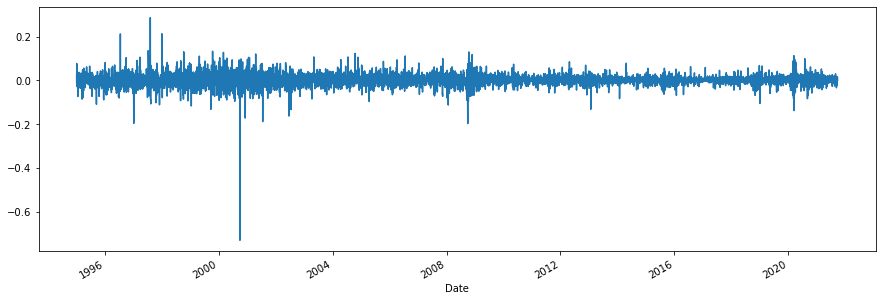

In [64]:
AAPL['log_return'].plot(figsize=(15,5))
plt.show()

In [72]:
log_return_d = AAPL['log_return'].mean()
log_return_d

0.0009249279452414539

In [73]:
log_return_a = AAPL['log_return'].mean() * 250
log_return_a

0.23123198631036346

In [74]:
#Apple Log return in percentage points
print (round(log_return_a, 5) * 100)

23.122999999999998


In [48]:
AAPLquote = si.get_quote_table("aapl")
AAPLquote

{'1y Target Est': 167.92,
 '52 Week Range': '107.32 - 157.26',
 'Ask': '146.97 x 1400',
 'Avg. Volume': 79686860.0,
 'Beta (5Y Monthly)': 1.2,
 'Bid': '146.96 x 800',
 "Day's Range": '145.57 - 147.47',
 'EPS (TTM)': 5.11,
 'Earnings Date': 'Oct 27, 2021 - Nov 01, 2021',
 'Ex-Dividend Date': 'Aug 06, 2021',
 'Forward Dividend & Yield': '0.88 (0.60%)',
 'Market Cap': '2.429T',
 'Open': 145.66,
 'PE Ratio (TTM)': 28.76,
 'Previous Close': 146.83,
 'Quote Price': 146.9199981689453,
 'Volume': 53477869.0}

In [76]:
AAPLquote["PE Ratio (TTM)"] 

28.76

In [79]:
AAPLincome = si.get_income_statement("aapl")
AAPLincome

endDate,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Breakdown,,,,
researchDevelopment,18752000000,16217000000,14236000000,11581000000
effectOfAccountingCharges,None,None,None,None
incomeBeforeTax,67091000000,65737000000,72903000000,64089000000
minorityInterest,None,None,None,None
netIncome,57411000000,55256000000,59531000000,48351000000
sellingGeneralAdministrative,19916000000,18245000000,16705000000,15261000000
grossProfit,104956000000,98392000000,101839000000,88186000000
ebit,66288000000,63930000000,70898000000,61344000000
operatingIncome,66288000000,63930000000,70898000000,61344000000


In [78]:
AAPLincome.loc["totalRevenue"]

endDate
2020-09-26    274515000000
2019-09-28    260174000000
2018-09-29    265595000000
2017-09-30    229234000000
Name: totalRevenue, dtype: object

In [83]:
AAPLsheet = si.get_balance_sheet("aapl")
AAPLsheet

endDate,2020-09-26,2019-09-28,2018-09-29,2017-09-30
Breakdown,,,,
totalLiab,258549000000,248028000000,258578000000,241272000000
totalStockholderEquity,65339000000,90488000000,107147000000,134047000000
otherCurrentLiab,47867000000,43242000000,39293000000,38099000000
totalAssets,323888000000,338516000000,365725000000,375319000000
commonStock,50779000000,45174000000,40201000000,35867000000
otherCurrentAssets,11264000000,12352000000,12087000000,13936000000
retainedEarnings,14966000000,45898000000,70400000000,98330000000
otherLiab,46108000000,50503000000,48914000000,43251000000
treasuryStock,-406000000,-584000000,-3454000000,-150000000


In [81]:
AAPLsheet.loc['totalStockholderEquity']

endDate
2020-09-26     65339000000
2019-09-28     90488000000
2018-09-29    107147000000
2017-09-30    134047000000
Name: totalStockholderEquity, dtype: int64

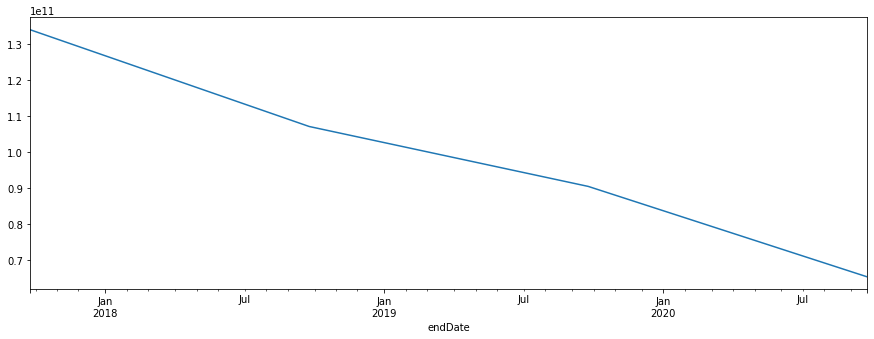

In [84]:
AAPLsheet.loc['totalStockholderEquity'].plot(figsize=(15,5))
plt.show()